In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = lena.shape
lena_lsb2 = lena.copy()
row_mid = rows // 2
col_mid = cols // 2

In [3]:
for i in range(rows):
    for j in range(cols):
        if i < row_mid and j < col_mid:       # Upper-left
            lena_lsb2[i, j] = (lena[i, j] % 2)
        elif i < row_mid and j >= col_mid:    # Upper-right
            lena_lsb2[i, j] =  ((lena[i, j] % 2) + 1)
        elif i >= row_mid and j < col_mid:    # Bottom-left
            lena_lsb2[i, j] = ((lena[i, j] % 2) + 2)
        else:                                 # Bottom-right
            lena_lsb2[i, j] = ((lena[i, j] % 2) + 3)

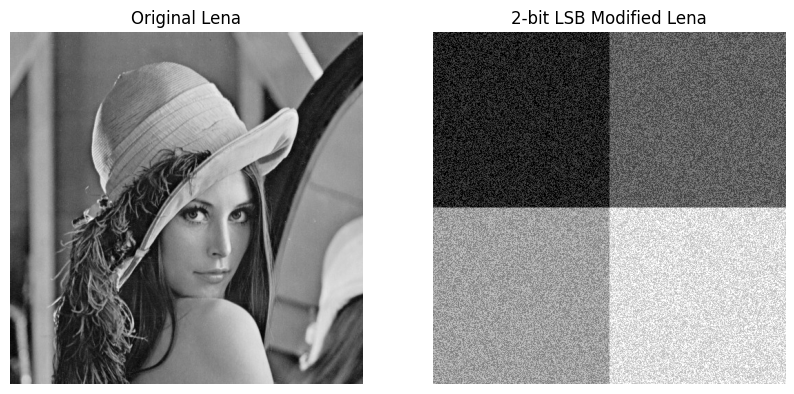

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Lena')
plt.imshow(lena, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('2-bit LSB Modified Lena')
plt.imshow(lena_lsb2, cmap='gray')
plt.axis('off')

plt.show()

In [5]:
# Save the 2-bit LSB modified image with different JPEG qualities
cv2.imwrite('lena_lsb2_100.jpg', lena_lsb2, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
cv2.imwrite('lena_lsb2_99.jpg', lena_lsb2, [int(cv2.IMWRITE_JPEG_QUALITY), 99])
cv2.imwrite('lena_lsb2_75.jpg', lena_lsb2, [int(cv2.IMWRITE_JPEG_QUALITY), 75])

# Read back the compressed images
lena_lsb2_100 = cv2.imread('lena_lsb2_100.jpg', cv2.IMREAD_GRAYSCALE)
lena_lsb2_99  = cv2.imread('lena_lsb2_99.jpg', cv2.IMREAD_GRAYSCALE)
lena_lsb2_75  = cv2.imread('lena_lsb2_75.jpg', cv2.IMREAD_GRAYSCALE)



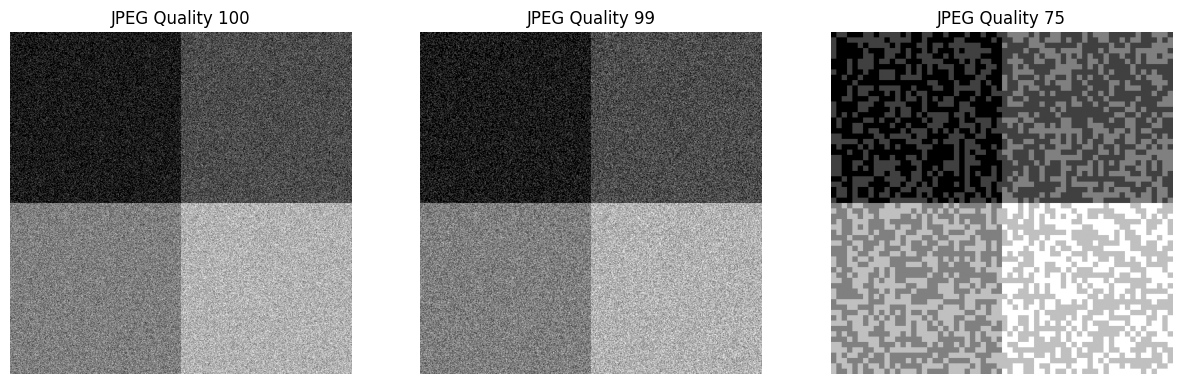

In [6]:
# Display the results
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('JPEG Quality 100')
plt.imshow(lena_lsb2_100, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('JPEG Quality 99')
plt.imshow(lena_lsb2_99, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('JPEG Quality 75')
plt.imshow(lena_lsb2_75, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
# The 2-bit LSB steganography allows hiding information in the Lena image with minimal visual distortion. 
# The embedded data is mostly preserved under high-quality JPEG compression (Q=100, Q=99), but lower-quality compression (Q=75) starts to distort the 2-bit LSB, reducing the reliability of hidden information. 
# This shows that LSB-based methods are sensitive to lossy compression, and higher JPEG quality is preferred when resilience is required.